## <ins style="color:orange">Report by KHOUTAIBI Iliass and BARAKA Rayane</ins>:

This report is to answer the question of approximating an integral using numerous quadrature methods.  

The goal is as follows: for a continuous function $f$ over an interval $\chi$

$$ \int_{\chi} f(x) w(x) dx \approx \sum_{k=0}^{n} w_{k}f(x_{k})$$

Before starting, let us import some useful modules which will help us with our problem

In [54]:
import numpy as np
import scipy.special as special
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

1. For $ \chi$ = [a, b], what change of variable should be applied to the nodes $x_{i}$ ?

The different quadrature methods should be applied on the intervaals of type $[-1,1]$, in order to go back to such interval, we can apply the following transformation on the integral $\int_{a}^{b} f(x)w(x) dx$:

$$ \frac{b-a}{2} u + \frac{b+a}{2} = x$$

So, the transformation that should be applied on the nodes is as follow:

$$ \tilde{x}_{i} = \frac{b-a}{2} x_{i} + \frac{b+a}{2}$$

The quadrature method then becomes:

$$ \int_{-1}^{1} f(\frac{b-a}{2} u + \frac{b+a}{2})w(\frac{b-a}{2} u + \frac{b+a}{2}) du \approx \frac{b-a}{2} \sum_{k=0}^{n} w_{k}f(\tilde{x}_{k})$$

The following question is an implementation of this quadrature method.



2. Implement a function <strong> def gauss_legendre_simple(f, a, b, nodes, weights) </strong> that approximates the integral of a function f over $[a, b]$ using the Gaussian-Quadrature rule. Test your implementation on some analytically integrable function of your choice.

In [55]:
def gauss_legendre_simple(f, a ,b ,nodes, weights):

    # Update the nodes using the previous question
    nodes_updated = nodes * (b-a)/2 + (b+a)/2
    array_f = f(nodes_updated)

    # Summing over all the nodes*weights and normalizing
    return np.sum(array_f * weights) * (b-a)/2

In order to test the validity of our implementation, let un integrate the usual function $\cos(x)$ over the interval $[0,2\pi]$, the result should give us 

$$ \int_{0}^{2\pi} \cos(x)dx = 0$$

In [56]:
# We take the lambda function cos, a = 0 and b = 2pi
f = lambda x : np.cos(x)
a = 0
b = 2*np.pi

# In this case, we will use the legendre nodes and weights
nodes, weights = special.roots_legendre(10)

# Getting the result with gauss legendre roots and weights
result = gauss_legendre_simple(f, a, b, nodes, weights)

print(f"The integral of cos over 0 and 2pi is: {result}")

The integral of cos over 0 and 2pi is: 2.0186038932224956e-14


As we can see, the integral gives a value that is practically null, attesting to the correctness of our implementation.



3. Implement a function <strong> def gauss_legendre(f, n, M, a, b) </strong> that performs the composite rule of
Gauss-Legendre over M sub-intervals of $[a, b]$

In order to Implement the composite Gauss Legendre quadrature method, we do the following:

- We divide our interval using equidistant nodes.
- Apply Gauss Legendre Simple over the Subintervales.
- Sum the contributions of all the approximations on the subintervales. 

To transform a Gauss Legendre node $\alpha_j$ from $[-1,1]$ to a subinterval $[x_i,x_{i+1}]$, we apply the following transformation

$$ \tilde{\alpha}_j = \frac{x_{i+1} - x_i}{2} \alpha_j + \frac{x_{i+1} + x_i}{2}$$

This shifts the node to the interval $[x_i,x_{i+1}]$

The Following code implements the function.

In [57]:
def gauss_legendre(f, n, M, a, b):

    # calcualting the nodes which are legendre's roots and the equidistant nodes
    nodes, weights = special.roots_legendre(n)
    equidistant_nodes = np.linspace(a, b, M+1)
    subinterval_approximation = []

    for j in range(M):
        # Appending the results of the approximations
        subinterval_approximation.append(
            gauss_legendre_simple(f, equidistant_nodes[j], equidistant_nodes[j+1], nodes, weights)
        )

    return np.sum(subinterval_approximation)

3. Write an identical function but with a vectorized implementation <strong> gauss_legendre_vectorized(f, n, M, a, b) </strong> with numpy (does not contain any loop or list comprehensions. Hint : it should not call gauss_legendre_simple).

The implementation of the method equires to use no loops or list comprehensions, i.e we should only use numpy in order to implement the quadrature method.

We can use the various numpy function and slicing in order to implement the method.

In [58]:
def gauss_legendre_vectorized(f, n, M, a, b):

    # Getting the Gauss Legendre Nodes
    nodes, weights = special.roots_legendre(n)  

    # Equidistant nodes
    equidistant_nodes = np.linspace(a, b, M+1)

    # Shifting the nodes to [x_i, x_i+1] and the weights too
    updated_nodes = 1/2 * nodes * (equidistant_nodes[1:] - equidistant_nodes[:-1])[:,np.newaxis] + 1/2 * (equidistant_nodes[1:] + equidistant_nodes[:-1])[:, np.newaxis ]
    weights_updated = 1/2 * weights * (equidistant_nodes[1:] - equidistant_nodes[:-1])[:, np.newaxis]

    f_values_at_nodes = f(updated_nodes)

    # Summing the subinterval nodes
    subinterval_approximations = np.sum(weights_updated * f_values_at_nodes, axis = 1)

    # summing all the approximations
    return np.sum(subinterval_approximations)

Let us test the correctness of our results using the previous implmentations.

In [59]:
# We take the lambda function cos, a = 0 and b = 2pi
f = lambda x : np.cos(x)
a = 0
b = 2*np.pi

# In this case, we will use the legendre nodes and weights
nodes, weights = special.roots_legendre(10)

# Getting the result with gauss legendre roots and weights
result_simple = gauss_legendre_simple(f, a, b, nodes, weights) 
result_legendre = gauss_legendre(f, 10, 10, a, b) 
result_vectorized = gauss_legendre_vectorized(f, 10, 10, a, b) 

print(f"The integral of cos over 0 and 2pi using gauss_legendre_simple is: {result_simple}")
print(f"The integral of cos over 0 and 2pi using gauss_legendre is: {result_legendre}")
print(f"The integral of cos over 0 and 2pi using gauss_legendre_vectorized is: {result_vectorized}")

The integral of cos over 0 and 2pi using gauss_legendre_simple is: 2.0186038932224956e-14
The integral of cos over 0 and 2pi using gauss_legendre is: -3.3306690738754696e-16
The integral of cos over 0 and 2pi using gauss_legendre_vectorized is: -2.220446049250313e-16


4. Visualize in one plot the integration error of $\int_{2}^{5} \frac{1}{x} dx$ as a function of both n and M

As we know : 

$$\int_{2}^{5} \frac{1}{x} dx = \log(\frac{5}{2})$$

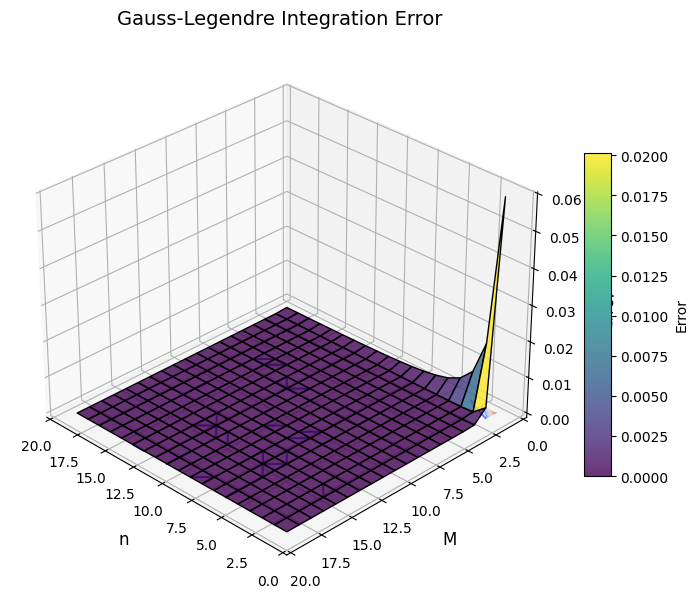

In [60]:
# 1/x function
f = lambda x: 1 / x

fig = plt.figure(figsize=(9, 7))  
ax = fig.add_subplot(111, projection='3d')

n_max, M_max = 20, 20
a, b = 2, 5

n_values = np.arange(1, n_max, 1)
M_values = np.arange(1, M_max, 1)
results = np.zeros((n_max, M_max))

# Exact integral
target_value = np.log(5/2)

# Gauss Legendre
for i in n_values:
    for j in M_values:
        results[i, j] = gauss_legendre_vectorized(f, i, j, a, b)

# This numpy function meshses grids to plot in 3d! MUST KEEP!
n_grid, M_grid = np.meshgrid(n_values, M_values)

# Adding the error of quad too, dont forget this
error = np.abs(results - target_value)

# plotting the surface
surf = ax.plot_surface(n_grid, M_grid, error[1:, 1:], cmap='viridis', edgecolor='k', alpha=0.8)

# adding contours to line, might change!
ax.contour(n_grid, M_grid, error[1:, 1:], zdir='z', offset=np.min(error), cmap='coolwarm')


ax.set_xlabel("n", fontsize=12, labelpad=10)
ax.set_ylabel("M", fontsize=12, labelpad=10)
ax.set_zlabel("Error", fontsize=12, labelpad=10)
ax.set_title("Gauss-Legendre Integration Error", fontsize=14, pad=15)

# Colors here
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, label="Error")

# Chaning axis, the default one is ugly for us
ax.view_init(elev=30, azim=135)  
plt.show()

As we can see, increasing the values of $n$ and $M$ decreases the error of the integration.

5. Write a function def trapezoidal that computes the composite trapezoidal rule of Ex 1. Compare the integration error with the Gauss-Legendre method with the same values of M and the number of nodes. What do you conclude ?

The classical trapezoid quadrature method is as such:
$$\int_{a}^{b} f(x) dx \approx \frac{(b-a)}{2} (f(a) + f(b)) = I_{a,b}$$

The composite Trapezoid method is the application of the trapezoid method on all subintervals, i.e for :
$$[a,b] = [x_0,x_1]\cup ... \cup[x_{n-1},x_n]$$

For our implementaiton, we will use equidistant nodes, i.e $x_{k+1} - x_k = \frac{b-a}{n}$

we have : 
$$ \int_{a}^{b} f(x) dx \approx \sum_{k=0}^{n-1} I_{x_k,x_{k+1}} = \frac{b-a}{2n} \sum_{k=0}^{n-1} (f(x_{k+1} + f(x_k)) = \frac{b-a}{2n}(f(x_0) + 2f(x_1)+...+2f(x_{n-1}) + f(x_n))$$

Thus

$$\int_{a}^{b} f(x) dx \approx \frac{b-a}{n}(\frac{f(x_0)}{2} + f(x_1)+...+f(x_{n-1}) + \frac{f(x_n)}{2}) $$

The implementation of the trapezoid quadrature method is as follows:


In [61]:
def trapezoid(f, a, b, M):
    # equidistant nodes
    equidistant_nodes = np.linspace(a, b, M+1)
    # Getting the weights
    weights = np.ones(M+1)
    weights[0] = 1/2
    weights[-1] = 1/2

    return (b-a)/M * np.sum(f(equidistant_nodes) * weights)

In [62]:
# We take the lambda function cos, a = 0 and b = 2pi
f = lambda x : 1/x
a = 2
b = 5
n = 10
M = 10

# Getting the result with gauss legendre roots and weights
result_trapezoid = trapezoid(f, a, b, M)
result_legendre = gauss_legendre(f, n, M, a, b)
real_result, e = integrate.quad(f, a, b)

print(f"The integration error of 1/x over 2 and 5 using trapezoid is: {np.abs(result_trapezoid-real_result)}")
print(f"The integration error of 1/x over 2 and 5 using gauss legendre is: {np.abs(result_legendre-real_result)}")

The integration error of 1/x over 2 and 5 using trapezoid is: 0.0015709332397410014
The integration error of 1/x over 2 and 5 using gauss legendre is: 1.1102230246251565e-16


As we can see, the integration error using the Trapezoid method is bigger than the one using the composite Gauss-Legendre method. However, the result remains good nonetheless.

6. Mini-project Implement different Gauss-quadrature rules (different set of nodes i.e different space X ) that approximate the probability $\mathbb{P}(X ≤ a)$ for a Gaussian random variable $X \sim N (0, 1)$ and
some $a \in \R$. Evaluate the accuracy of your approximation (as a function of n) using scipy.stats.norm.cdf.
Which rule is more accurate and why?

As explained in the course:  
- For $\chi = [−1, 1]$ and $w(x) = \frac{1}{2}$, $(P_0, P_1, . . . )$ are called the Legendre polynomials.
- For $\chi = \R$ and $w(x) = \frac{1}{\sqrt{2\pi}} \exp(\frac{−x^{2}}{2})$, $(P_0, P_1, . . . )$ are called the Hermite polynomials.
- For $\chi = [0, +∞]$ and $w(x) = \exp(-x)$, $(P_0, P_1, . . . )$ are called the Laguerre polynomials.

<ins style="color:orange">Gauss Hermit Qudrature Method:</ins>

For $X \sim \mathcal{N}(0,1)$ , we have
$\mathbb{P}(X \leq a)  = \displaystyle\int_{- \infty}^{a} \frac{1}{\sqrt{2 \pi}
}e^{-\frac{x^{2}}{2}}dx =\displaystyle\int_{- \infty}^{+\infty} \frac{1}{\sqrt{2 \pi}
}e^{-\frac{x^{2}}{2}} \mathbb{1}_{[- \infty,a]}(x)dx  \approx \displaystyle\int_{\mathbb{R}} f(x)w(x)dx  $

With $f(x)= \mathbb{1}_{[- \infty,a]}(x)$ and $w(x) = \frac{1}{\sqrt{2\pi}} \exp(\frac{−x^{2}}{2})$

There exists a scipy function which already provides us with the Hermit weights and nodes. However, the weight function of scipy is $w(x) = \exp(-x^{2})$. So we need to make sure to correctly integrate by substitution, the integration becomes:

$$x = \frac{y}{\sqrt{2}} \iff y = \sqrt{2}x$$  


Coupled with the integration by substitution, we obtain:


$$ \int_{- \infty}^{a} \frac{1}{\sqrt{2 \pi}}e^{-\frac{x^{2}}{2}}dx = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{\pi}} \exp(-x^2) \mathbb{1}_{[-\infty, a]} (\sqrt{2}x)dx =  \int_{-\infty}^{+\infty} \frac{1}{\sqrt{\pi}} \exp(-x^2) \mathbb{1}_{[-\infty, \frac{a}{\sqrt{2}}]} (x)dx $$

Thus,

$$ \int_{-\infty}^{+\infty} \frac{1}{\sqrt{\pi}} \exp(-x^2) \mathbb{1}_{[-\infty, \frac{a}{\sqrt{2}}]} (x)dx \approx \frac{1}{\sqrt{\pi}} \sum_{i=0}^{n} w_i \mathbb{1}_{[-\infty, \frac{a}{\sqrt{2}}]}(x_i) $$


The function below is a preliminary implementation of the probability approximation.

In [63]:
def incorrect_proba_hermit(n, a):
     # calcualting the nodes and weights
    nodes, weights = special.roots_hermite(n)
    weights /= np.sqrt(np.pi)
    # Remove indexes where f(x) <= a
    threshhold = nodes <= a/np.sqrt(2)
    prob = np.sum(weights * threshhold)

    return prob

This may seem to work at first. However, if we take $n$ is an odd number and $a = 0$, we get incorrect results! Take for instance $n = 11$, we get a very bad approximation of what should be $1/2$, while taking $n = 10$ gives us correct results.

In [64]:
incorrect_result = incorrect_proba_hermit(11, 0)
correct_result = incorrect_proba_hermit(10, 0)
exact_result = stats.norm.cdf(0)

print(f"The error of the approximation for n = 10 is: {np.abs(correct_result - exact_result)}") 
print(f"The error of the approximation for n = 11 is: {np.abs(incorrect_result - exact_result)}") 

The error of the approximation for n = 10 is: 0.0
The error of the approximation for n = 11 is: 0.18470418470418482


But Why ? 

This goes back to the nature of the Hermit Polynomials, for $n$ even, the function is an even function and $0$ is not a node of the function, so we sum the contribution of all the weights such that the roots are strictly negative.

For $n$ odd, the Hermit Polynomials are odd functions, so $0$ is a node of the polynomials, this means we should add the contribution of the weight at $0$.

Let us plot the nodes/weights to further explain this problem.

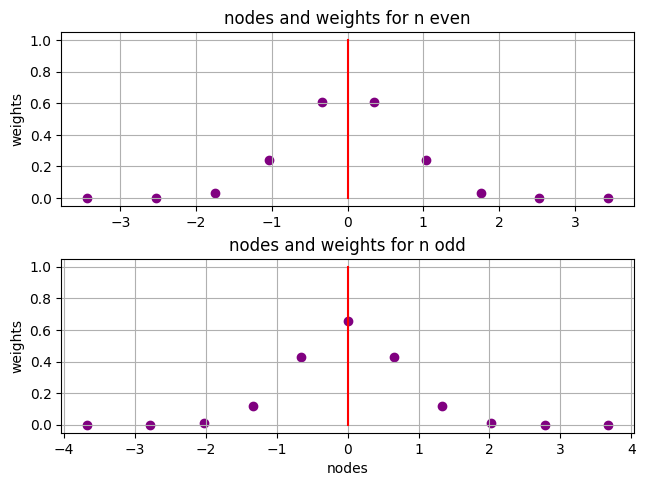

In [65]:
# Understanding why the result is false for n odd and a = 0
# We shall plot the nodes and weights for an odd and even n
# In this case, n = 10 or n = 11

nodes_even, weights_even = special.roots_hermite(10)
nodes_odd, weights_odd = special.roots_hermite(11)

plt.figure()
plt.subplot(211)
plt.grid()
plt.scatter(nodes_even, weights_even, color='purple')
plt.title("nodes and weights for n even")
plt.ylabel("weights")
plt.plot([0,0],[0,1], color='red')

plt.subplot(212)
plt.grid()
plt.scatter(nodes_odd, weights_odd, color = 'purple')
plt.title("nodes and weights for n odd")
plt.xlabel("nodes")
plt.ylabel("weights")
plt.plot([0,0],[0,1], color = 'red')
plt.tight_layout(pad=0.5)
plt.show()

As we can see, for $n$ odd, we forgot to add the contribution of the null node. In order to fix this issue, we modify the function to take into account the null node by adding : $\frac{1}{2} w_{0}$ to the sum of probabilities.

The function down below is the correct implementation of the Gauss Hermit quadrature.

In [66]:
def correct_prob_hermit(n,a):
    # calcualting the nodes and weights
    nodes, weights = special.roots_hermite(n)
    weights /= np.sqrt(np.pi)
    # Remove indexes where f(x) <= a
    threshhold = nodes < a/np.sqrt(2)

    # Adding contribution of null weight to the sum
    if a == 0 and n%2 == 1:
        zero_weight = weights[n//2]
        prob = np.sum(weights * threshhold)
        prob += 1/2 * zero_weight

    else:
        prob = np.sum(weights * threshhold)

    return prob

In Order to test the correctness of this new method, let us calculate $\mathbb{P}(X \leq 0) = \frac{1}{2}$ for various n values, odd and even. 

In [67]:
n_values = [1,5,10,20,33,40]
real_proba = stats.norm.cdf(0)
for i in n_values:
    result = correct_prob_hermit(i, 0)
    print(f"the error is: {np.abs(real_proba - result)} for n = {i}")

the error is: 0.0 for n = 1
the error is: 0.0 for n = 5
the error is: 0.0 for n = 10
the error is: 1.1102230246251565e-16 for n = 20
the error is: 5.551115123125783e-17 for n = 33
the error is: 0.0 for n = 40


The value is exactly $0.5$ when using this corrected Gauss-Hermit quadrature. Now let us use the Gauss-Laguerre quadrature.

<ins style="color:orange">Gauss Hermit Qudrature Method:</ins>
  
Let $X \sim \mathcal{N}(0,1)$ , we have :

$\mathbb{P}(X \leq a)  = \int_{- \infty}^{a} \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}dx $

With the variable $u = \frac{x^2}{2}$, we find that:

$$ \mathbb{P}(X \leq a) = \displaystyle\int_{a²/2}^{+\infty} \frac{1}{2\sqrt{u\pi}}e^{-u}dx = \int_{0}^{+\infty} \frac{1}{2\sqrt{u\pi}}e^{-u}\mathbb{1}_{[\frac{a^2}{2}, +\infty]}(x)dx \approx \sum_{i=0}^{n} w_i \frac{\mathbb{1}_{[\frac{a^2}{2}, +\infty,]}(x_i)}{2\sqrt{\pi x_i}}$$   

Using the Laguerre Polynomials, we get the approximation of the integral. The function below is an implementation of the Gauss Laguerre quadrature method. 

In [68]:
def proba_laguerre(n, a):
  # nodes and weights and the function
  nodes,weights= special.roots_laguerre(n)
  f = lambda x : 1/(2*np.sqrt(x*np.pi))
  
  # taking only the nodes superior to a**2 / 2
  threshold = nodes >= pow(a,2)/2
  new_nodes  = nodes * threshold
  # thresholding the weights too
  weights = weights * threshold
  array_f = f(new_nodes)

  
  return np.sum(array_f * weights)

With this definition, we can test the correctness of the quadrature method. Let us calculae the value of the probability at 0 for various n values. 

In [69]:
n_values = [10, 50, 100, 200, 300]
for i in n_values:
    proba = proba_laguerre(i, 0)
    print(f"The error of the quadrature method is: {np.abs(proba - real_proba)} for n = {i}")

The error of the quadrature method is: 0.0766610229197962 for n = 10
The error of the quadrature method is: 0.03464421401403184 for n = 50
The error of the quadrature method is: 0.024529395384203567 for n = 100
The error of the quadrature method is: 0.017356321276117526 for n = 200
The error of the quadrature method is: 0.014174487617365172 for n = 300


The Method does give an approximation of the probability at $a = 0$, but with noticable error compared to the Gauss-Hermit quadrature.

<ins style="color:orange">Gauss Legendre Qudrature Method:</ins>

The Gauss Legendre quadrature Method is a bit tricky since it is an integral over an interval $[a,b]$. So to calculate an infinite integral, it is up to us to define a large negative number for $a$. Let us for example, take $a = -10 , -100, -1000, -10000$.

We also have to take $f = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}$.

In [70]:
f = lambda x: np.exp(-pow(x,2)/2)/np.sqrt(2*np.pi)
# Getting the result
a = [-10, -100, -1000, -10000]
for i in a:
    result = gauss_legendre(f, 10, 10, i, 0)
    print(f"The error of the approximation using Gauss Legendre for a = {i} and b = 0 is: {np.abs(result - exact_result)}")

The error of the approximation using Gauss Legendre for a = -10 and b = 0 is: 0.0
The error of the approximation using Gauss Legendre for a = -100 and b = 0 is: 5.0777854593286875e-06
The error of the approximation using Gauss Legendre for a = -1000 and b = 0 is: 0.06780221521183882
The error of the approximation using Gauss Legendre for a = -10000 and b = 0 is: 0.5


As we can see, the Gauss-Legendre quadrature method quickly gives inaccurate results when decreasing $a$, this is because of how the nodes are equidistantly places on $[-\infty, b]$. Since $\exp(-x^2)$ decays quickly, we miss the contribution of the princiapl lobe of the gaussian which is close to zero because of the big step.



<ins style="color:orange">Which rule is more accurate and why ?</ins>

The most accurate approximation is the Gauss-Hermit quadrature, since the weight function already corresponds to the density function of the probability $\mathbb{P}$, i.e:  

$$w(x) = \exp(-x^2)$$

So summing $w$ gives us the best results!